# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header=0) # YOUR CODE HERE
#print(df.columns)
#print(df['review_scores_rating'])
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Answers: 
1) The dataset I have chosen is the airbnb dataset, because it includes several numerical and categorical columns that I can explore.

2) The label I will be predicting is the review_scores_rating column, to predict what the overall review of the airbnb listing is.

3) This is a supervised learning problem, since the data used for training will be labeled. Although the review_scores_rating column is currently numeric scores, I plan to make this into a multiclassification problem by assigning labels to the scores based on different rating thresholds.

4) There are several features I can use for this problem since this dataset is vast but some of them I plan to use include
[room_type, neighbourhood_group_cleansed, host_response_rate, host_acceptance_rate,host_is_superhost, host_listings_count, accommodate, bedrooms, bathrooms, beds, price, minimum_nights, maximum_nights, availability_30, availability_60, availability_90, availability_365,number_of_reviews, instant_bookable, has_availability]. 

Since I will use a lot of columns I wanted to mention some columns I would drop, such as all the smaller review_scores columns that seem repetitive, since the overall review scores is what is being predicted, and columns like host name, description, etc. that will not contribute to the problem. 

5) This is an important problem because it can help find airbnb listings that are highly rated and recommend them to users, and well as filter out listings that will potentially do worse, giving the people who posted the listing a chance to improve their listing depending on what is giving them a low rating, and overall see what customers like. This predictive model can mostly help customers, which is a big part of any business problem, by making them have an efficient and easy experience selecting a place to stay.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

**EDA and insights**

I will begin inspecting the overall dataset. I will do this before converting the label from a numeric column to a labeled object column, since exploring this will be easier with numbers. 

In [3]:
print("DataFrame Shape: ", df.shape, "\n")
print("Data Types of Columns: \n", df.dtypes)

DataFrame Shape:  (28022, 50) 

Data Types of Columns: 
 name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                      

From inspecting the column data types, I see that I will be working mostly with numeric columns, but there are a few object columns I will have to one-hot-encode, like room types. Some boolean columns can also be useful, so changing true\false values into 0 and 1 during the data preparation step might be needed. 

In [4]:
df.isnull().sum()

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

After reviewing the null count, I also will have to drop some columns, but most of these are columns I wanted to drop anyway. Columns with null values that I wanted to keep are host_response_rate, bedrooms and beds, so I will have to fill the missing values with the mean values from the dataset. 

In [5]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


From these simple summary statistics, I can tell the spread of the data seems mostly evenly distributed, but there definitely some skew. For example, one thing I noticed is that after the 50% range in the spread, columns like host_response_rate, all of the 'review_scores' columns, etc, have much higher scores, indicating that this dataset may have less examples of 'bad scores', but I do not think this will cause a problem overall. Since I want to convert the label to object type to make this multiclassification, I will do this now to check for class imbalance. 

In [6]:
def classify_rating(rating):
    if pd.isnull(rating):
        return None
    elif rating >= 4.5:
        return 'High'
    elif rating >= 3.5:
        return 'Medium'
    else:
        return 'Low'
df['review_rating_class'] = df['review_scores_rating'].apply(classify_rating)
df['review_rating_class'].value_counts()

High      23263
Medium     4013
Low         746
Name: review_rating_class, dtype: int64

There definitely is a class imbalance, so during model testing and training, I will split the data using train_test_split() to adjust the sampling in a way that corresponds with the imbalance. Now I will look at the top features the label is correlated with in order to gain insight and possibly reduce the feature list. I will first reduce the list because some columns are irrelevant or repetitive. 

In [7]:
drop_list = ['name', 'description', 'neighborhood_overview','host_name', 'host_location',
'host_about','host_acceptance_rate', 'amenities', 'review_scores_value', 'review_scores_communication',
'review_scores_checkin', 'review_scores_location', 'number_of_reviews_l30d', 'number_of_reviews_ltm']  
corrs_df = df.drop(drop_list, axis=1)

In [8]:
corrs = corrs_df.corr()['review_scores_rating'].drop('review_scores_rating', axis = 0)
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted.head(5)

review_scores_cleanliness    0.758213
host_response_rate           0.121477
number_of_reviews            0.067182
n_host_verifications         0.050888
price                        0.045067
Name: review_scores_rating, dtype: float64

Since the top 5 correlations are review_scores_cleanliness, host_response_rate, number_of_reviews, n_host_verifications, and price, I will create some visualizations to help understand their impact on the label. 

In [9]:
top5 = ['review_scores_cleanliness', 'host_response_rate', 
        'number_of_reviews', 'n_host_verifications', 'price']

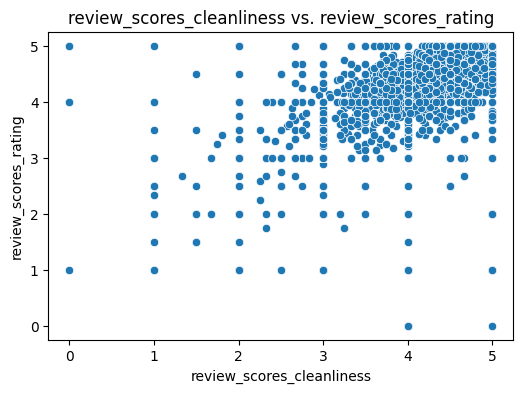

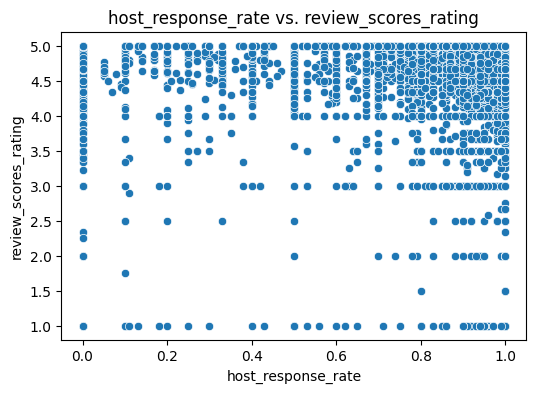

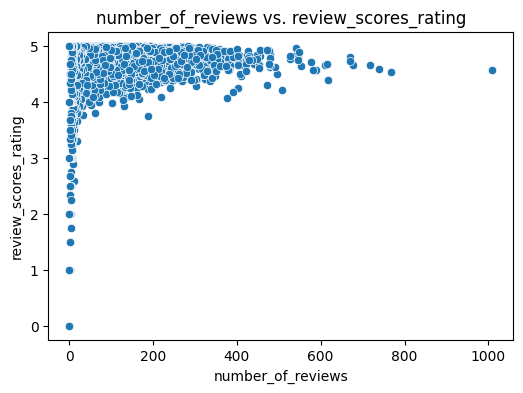

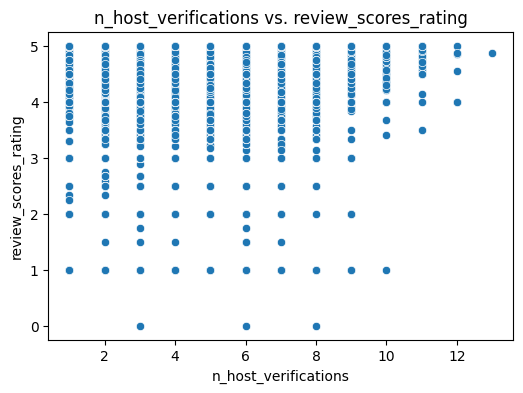

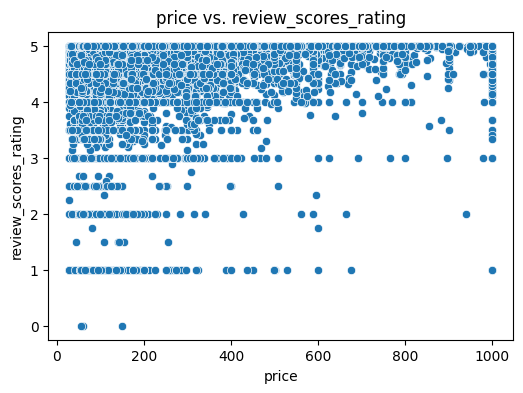

In [10]:
for feature in top5:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=feature, y='review_scores_rating')
    plt.title(f'{feature} vs. review_scores_rating')
    plt.xlabel(feature)
    plt.ylabel('review_scores_rating')
    plt.show()

These scatterplot visualizations for the top 5 features and their correlation with the review_scores_rating.
Here is what I can tell from them:
1. review_scores_cleanliness vs. review_scores_rating: The higher the cleanliness score, the higher the overall score, which shows that customers value a clean space and therefore it determines the overall rating of the airbnb.

2. host_response_rate vs. review_scores_rating: While the data is really spread out, there is high concentration in the top right indicating that customers value when hosts have effective communication, so it should be considered for the model.

3. number_of_reviews vs. review_scores_rating: Listings with hundreds of reviews seem to have overall better reviews, which can indicate that some airbnbs are popular and good since they have good ratings. 

4. n_host_verifications vs. review_scores_rating: There is a pretty even spread of datapoints here, which shows that hosts with any amount of verifications can get any score. The part that probably explains their correlation is that hosts with 10+ verifications received rating scores that were 3+. 

5. price vs. review_scores_rating: The datapoints for this correlation are also very spread out, but there is a higher concentration in the 100-600 price range. showing that listings in this range usually have good reviews. 

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Project Plan: 

My feature list was updated a bit after doing exploratory data analysis. The top 10 highest correlated features will definitely be part of my list, but I will also add some new features such as host_is_superhost, has_availability, bedrooms, and accommodates. I plan to drop all the rest of the columns, since they are either text based or repetitive. For example, some of the columns are the same and just span over different amounts of days. I also do not want to have too many features in case the model becomes too complex and overfits. 
My updated feature list: [review_scores_cleanliness, host_response_rate, number_of_reviews, n_host_verifications, price, host_is_superhost, has_availability, bedrooms, accommodates]

Based on the exploratory data analysis, there are a few data preparation techniques I will have to use. Since I plan to keep the bedrooms and host_response_rate features, I will have to find the mean amount of both columns in the dataset and assign it to all of the missing values. I will also have to change the host_is_superhost and has_availability columns from boolean types to 0's and 1's.

The model I plan to use for this problem is a Random Forest since there are several features I want to take into consideration, and the problem involves predicting multiple labels. When researching how to fairly train my model, especially with class imbalance, I found that Random Forest Classifiers have a class_weight parameter that can be set to 'balanced', which adjusts for the uneven distribution of classes during training. I also plan to train the model using train_test_split with the stratify=y parameter, which will preserve the class proportions in both the training and testing sets. I’ll split the data into a 2/3 training set and 1/3 testing set.

To evaluate the model, I will use a confusion matrix, precision, and recall to clearly visualize how well the model performs on each class and where it may be making mistakes. After testing the initial model, I plan to improve performance by using GridSearchCV to find the optimal combination of hyperparameters like n_estimators, max_depth, and min_samples_split that can increase accuracy and help the model generalize better to new data.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [11]:
# YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

**5.1: Data Preparation**

Drop columns that will not be used/ reassign the dataframe

In [12]:
feature_list = ['review_scores_cleanliness', 'host_response_rate', 'number_of_reviews', 'n_host_verifications', 'price', 'host_is_superhost', 'has_availability', 'bedrooms', 'accommodates', 'review_rating_class']
df = df[feature_list]
df

,review_scores_cleanliness,host_response_rate,number_of_reviews,n_host_verifications,price,host_is_superhost,has_availability,bedrooms,accommodates,review_rating_class
0,4.62,0.80,48,9,150.0,True,True,NaN,1,High
1,4.49,0.09,409,6,75.0,True,True,1.0,3,Medium
2,5.00,1.00,2,3,275.0,True,True,2.0,4,High
3,3.73,1.00,507,4,68.0,True,True,1.0,2,Medium
4,4.82,NaN,118,7,75.0,True,True,1.0,1,High
...,...,...,...,...,...,...,...,...,...,...
28017,5.00,1.00,1,2,89.0,True,True,1.0,2,High
28018,5.00,0.91,2,5,1000.0,True,True,2.0,6,High
28019,1.00,0.99,1,2,64.0,True,True,1.0,2,Low
28020,5.00,0.90,1,7,84.0,True,True,1.0,3,High


In [13]:
df.isna().sum()

review_scores_cleanliness        0
host_response_rate           11843
number_of_reviews                0
n_host_verifications             0
price                            0
host_is_superhost                0
has_availability                 0
bedrooms                      2918
accommodates                     0
review_rating_class              0
dtype: int64

Fill in missing values and check that it worked: 

In [14]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].mean())

In [15]:
df.isna().sum()

review_scores_cleanliness    0
host_response_rate           0
number_of_reviews            0
n_host_verifications         0
price                        0
host_is_superhost            0
has_availability             0
bedrooms                     0
accommodates                 0
review_rating_class          0
dtype: int64

Find features with boolean dataypes and convert to numeric (0 or 1) values:

In [16]:
df.dtypes

review_scores_cleanliness    float64
host_response_rate           float64
number_of_reviews              int64
n_host_verifications           int64
price                        float64
host_is_superhost               bool
has_availability                bool
bedrooms                     float64
accommodates                   int64
review_rating_class           object
dtype: object

In [17]:
df['host_is_superhost'] = df['host_is_superhost'].astype(int)
df['has_availability'] = df['has_availability'].astype(int)

Confirm and inspect changes made to the data frame: 

In [18]:
df

,review_scores_cleanliness,host_response_rate,number_of_reviews,n_host_verifications,price,host_is_superhost,has_availability,bedrooms,accommodates,review_rating_class
0,4.62,0.800000,48,9,150.0,1,1,1.329708,1,High
1,4.49,0.090000,409,6,75.0,1,1,1.000000,3,Medium
2,5.00,1.000000,2,3,275.0,1,1,2.000000,4,High
3,3.73,1.000000,507,4,68.0,1,1,1.000000,2,Medium
4,4.82,0.906901,118,7,75.0,1,1,1.000000,1,High
...,...,...,...,...,...,...,...,...,...,...
28017,5.00,1.000000,1,2,89.0,1,1,1.000000,2,High
28018,5.00,0.910000,2,5,1000.0,1,1,2.000000,6,High
28019,1.00,0.990000,1,2,64.0,1,1,1.000000,2,Low
28020,5.00,0.900000,1,7,84.0,1,1,1.000000,3,High


**5.2: Create and fit model to the training data and evaluate model.**

Define Labels: 

In [19]:
X = df.drop("review_rating_class", axis=1)
y = df['review_rating_class']

Create training and test datasets:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234, stratify=y)
print(X_train.shape)
print(X_test.shape)

(18774, 9)
(9248, 9)


Train RandomForestClassifier

In [21]:
print("Begin Random Forest Implementation...\n")

#Create Random Forest
model = RandomForestClassifier(criterion='entropy', n_estimators=100, class_weight='balanced')

#Fit the model to training data
model.fit(X_train, y_train)

#Make predictions on test data
class_label_predictions = model.predict(X_test)

#Calculate accuracy score 
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy score: {0}\n'.format(acc_score))
print('End')

Begin Random Forest Implementation...

Accuracy score: 0.8662413494809689

End


Confusion Matrix to help understand:

In [23]:
print('Confusion Matrix for the model: ')

c_m = confusion_matrix(y_test, class_label_predictions, labels=['Low', 'Medium', 'High'])

conf_matrix_df = pd.DataFrame(c_m, columns=['Predicted: Low', 'Predicted: Medium', 'Predicted: High'],
    index=['Actual: Low', 'Actual: Medium', 'Actual: High']
)

print(conf_matrix_df)

Confusion Matrix for the model: 
                Predicted: Low  Predicted: Medium  Predicted: High
Actual: Low                117                 70               59
Actual: Medium              40                520              764
Actual: High                18                286             7374


The accuracy score from the model is quite high, which can possibly be an issue since the model might be overfitting. I also added a confusion matrix to see what labels were correctly predicted. 

Since this is just the model with pretty "default" parameters and not much tuning, and there is a ppossibility that it is overfitting, I will proceed with hyperparameter tuning and optimizing the model. 

**5.3: Improve model's performance by performing model selection and/or feature selection techniques to find best model for the problem.**

I will be using grid search to find the best hyperparameters for the model

Grid search to optimize model: 

In [25]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier()

#grid object
grid = GridSearchCV(estimator=rf, param_grid=param_grid,
                    cv=5, scoring='accuracy', n_jobs=-1)

# Fit to training data
grid.fit(X_train, y_train)

# Print results
print("Best parameters from GridSearchCV:\n", grid.best_params_)

Best parameters from GridSearchCV:
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}


Since the results show the best parameters for the model, I will test it: 

In [26]:
best_rf = grid.best_estimator_

# Predict with best model
best_preds = best_rf.predict(X_test)

# Accuracy
best_acc = accuracy_score(y_test, best_preds)
print('Tuned Accuracy Score:', best_acc)

# Confusion Matrix
print('\nConfusion Matrix for Tuned Model:')
c_m = confusion_matrix(y_test, best_preds, labels=['Low', 'Medium', 'High'])
pd.DataFrame(c_m, columns=['Predicted: Low', 'Predicted: Medium', 'Predicted: High'], index=['Actual: Low', 'Actual: Medium', 'Actual: High'])

Tuned Accuracy Score: 0.864294982698962

Confusion Matrix for Tuned Model:


,Predicted: Low,Predicted: Medium,Predicted: High
Actual: Low,118,73,55
Actual: Medium,40,573,711
Actual: High,21,355,7302


Although the resulting score is a little bit less than the beginning model, and the confusion matrix also reveals that there were more inaccurate predictions, this can possibly be a better model since this can reflect that the model generalizes well and is not just memorizing the data. 

To evaluate further, I will compare the training and testing accuracy score: 

In [27]:
train_acc = accuracy_score(y_train, best_rf.predict(X_train))
test_acc = accuracy_score(y_test, best_rf.predict(X_test))

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")


Training Accuracy: 0.9946
Testing Accuracy:  0.8643


Since the training and testing accuracy still seem very high, and have a pretty big gap between them, I will use cross validation to make sure the model is not just overfitting and is able to generalize better: 

In [35]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")

Cross-validation accuracy scores: [0.85941124 0.86190901 0.86134904 0.86777302 0.86420414]


Since the cross validation scores are all similar values, and they are not perfect scores, I would say this model generalizes well.

## **Final Conclusions**

Although the model generalizes well which is shown by the test data and cross validation scores, it is very important to know that it seems to be possibly overfitting the training data since the training accuracy is extremely high. I have tried different hyperparameters but they achieve similar/worse results, so I decided to stick with this model. Since the model seems to be generalizing well, and I used methods I found through documentation to deal with the class imbalance, like stratify and class_weight='balanced', I believe this is the best result I can achieve. 